# by Abdelrhman Saeed

## Bike Sharing Demand Prediction

Bike demand prediction is a common problem faced by bike rental companies, as accurately forecasting the demand for bikes can help optimize inventory and pricing strategies. In this project, I aim to develop a regression supervised machine learning model to predict the demand for bikes in a given time period.

Originally dataset of bike rental information from a bike sharing company, had information including details on the number of bikes rented, the time and date of the rental, and various weather and seasonality features, information on other relevant factors that could impact bike demand, such as holidays, functioning or non functioning day.

After preprocessing and cleaning the data, I split it into training and test sets and used the training data to train our machine learning model. I experimented with several different model architectures and hyperparameter settings, ultimately selecting the model that performed the best on the test data.

To evaluate the performance of our model, I used a variety of metrics, including mean absolute error, root mean squared error, and R-squared. I found that our model was able to make highly accurate predictions, with an R-squared value of 0.88 and a mean absolute error of just 2.58.

In addition to evaluating the performance of our model on the test data, I also conducted a series of ablation studies to understand the impact of individual features on the model's performance. I found that the temperature, as well as the weather and seasonality features, had the greatest impact on bike demand.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import datetime as dt

from scipy.stats import iqr

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data*

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*


In [2]:
df = pd.read_csv('SeoulBikeData.csv', encoding ='latin')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Missing Values

In [4]:
df.isna().any().sum()

0

## Changing column name

In [5]:
df=df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

## Changing data type

In [6]:
df['Date'] = df['Date'].str.replace('-', '/')
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(x, "%d/%m/%Y"))

In [7]:
df['Month'] = df['Date'].dt.month

In [8]:
df[['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month']] = df[['Hour', 'Seasons', 'Holiday', 'Functioning_Day','Month']].astype('category')

In [9]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12


## Exploratory Data Analysis

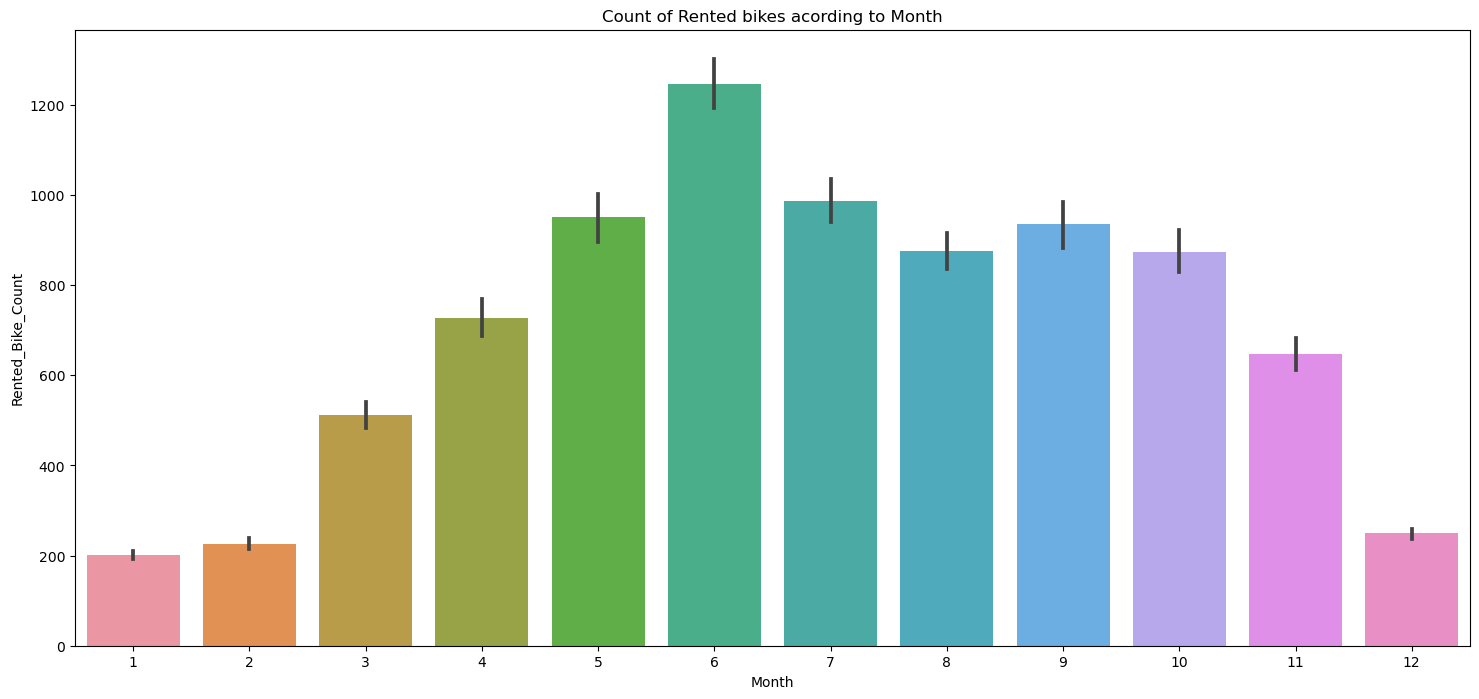

In [10]:
plt.figure(figsize=(18,8))
sns.barplot(data=df, x='Month', y='Rented_Bike_Count')
plt.title('Count of Rented bikes acording to Month')
plt.show()

from the above bar plot we can clearly say that, from the month 5 to 10 
 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.***

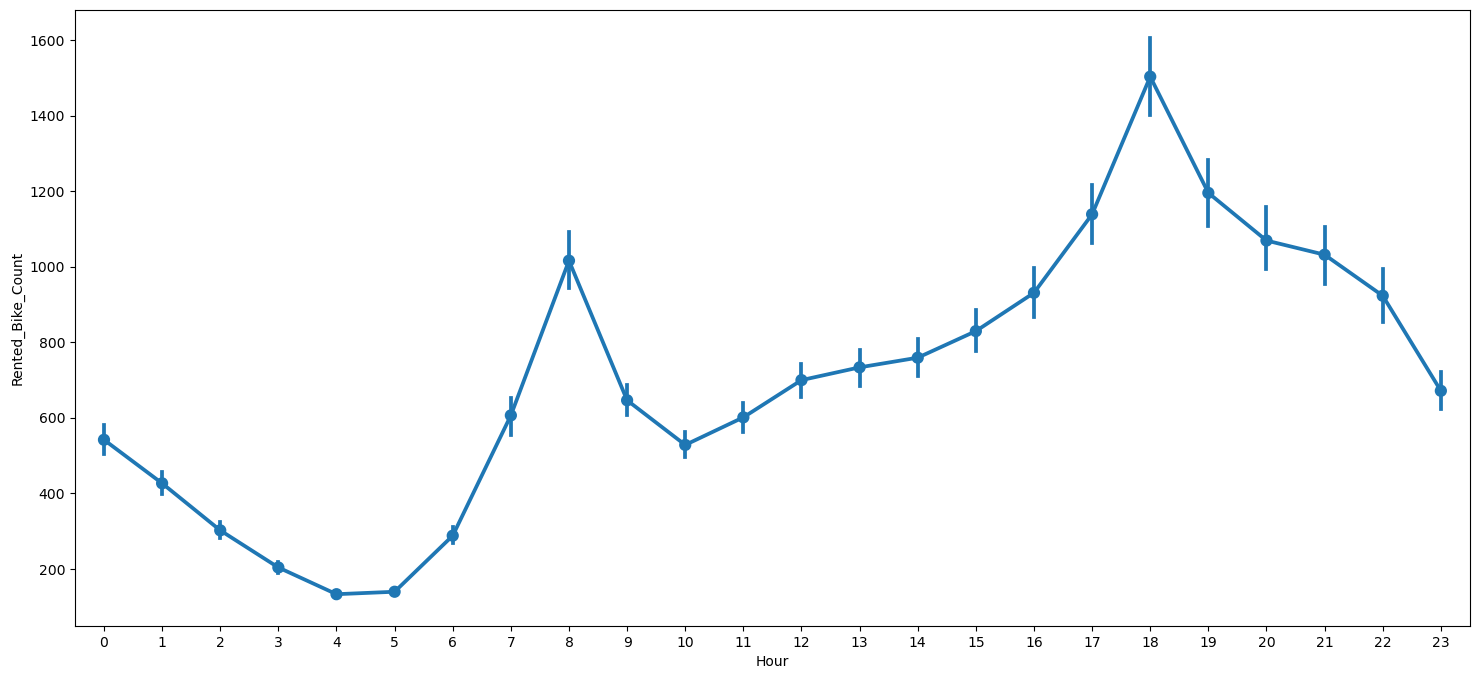

In [11]:
plt.figure(figsize=(18,8))
sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count')
plt.show()

* ***In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.***

* ***generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.***   

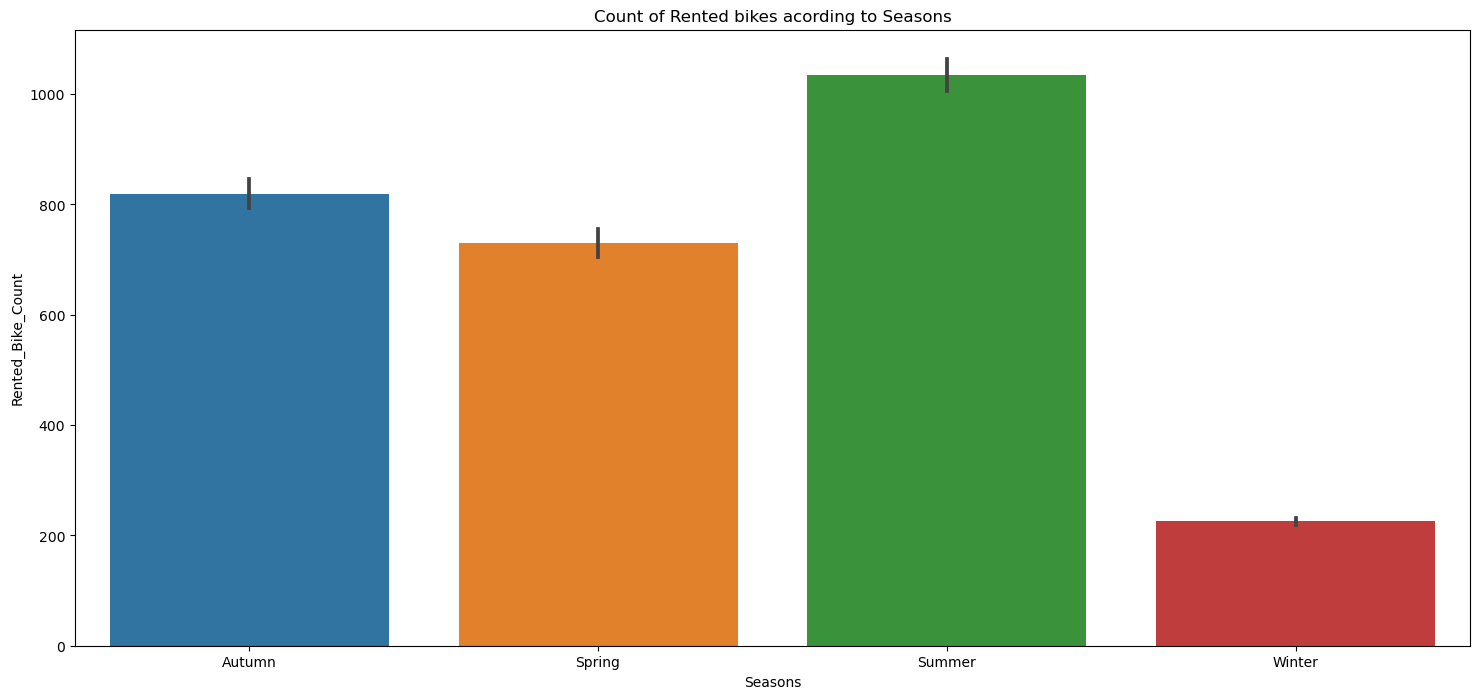

In [12]:
plt.figure(figsize=(18,8))
sns.barplot(data=df, x='Seasons', y='Rented_Bike_Count')
plt.title('Count of Rented bikes acording to Seasons')
plt.show()

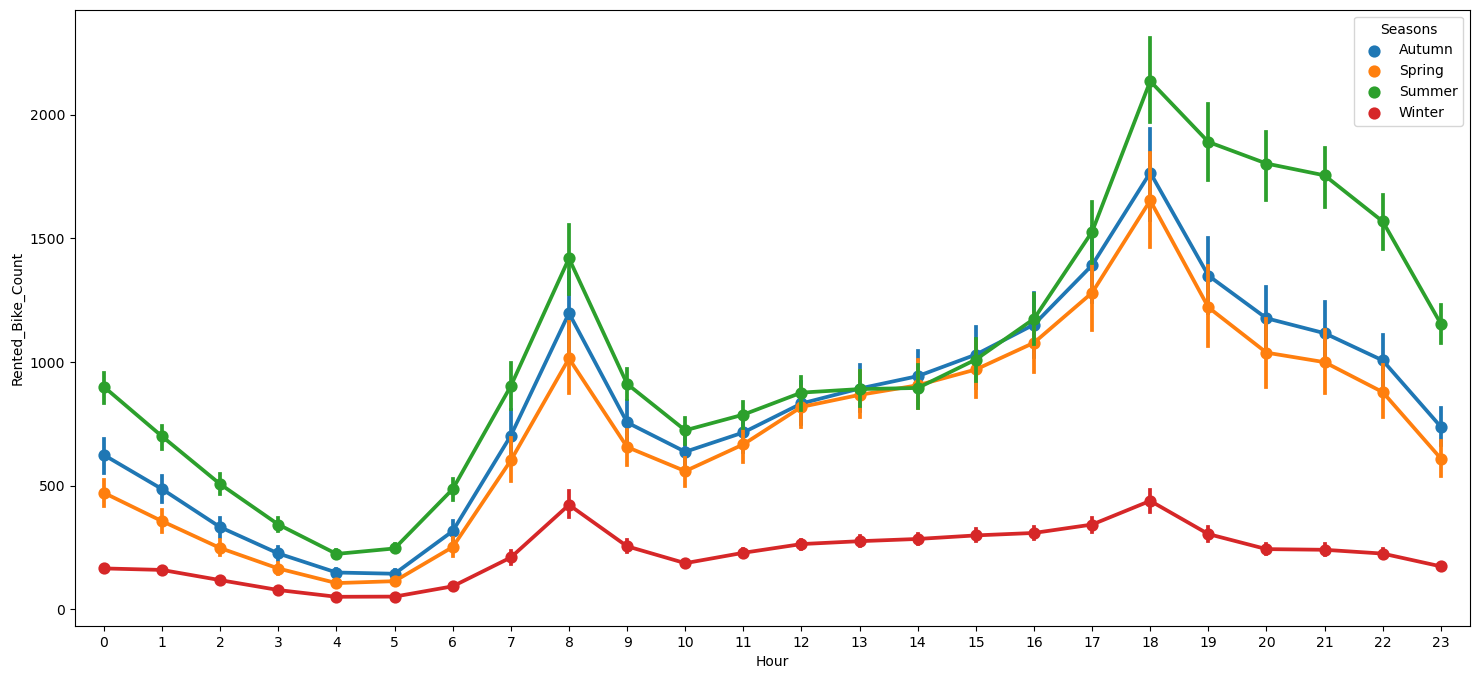

In [13]:
plt.figure(figsize=(18,8))
sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue='Seasons')
plt.show()

* ***In the above bar plot and point plot which shows, the use of rented bike in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.***
* ***In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc.***

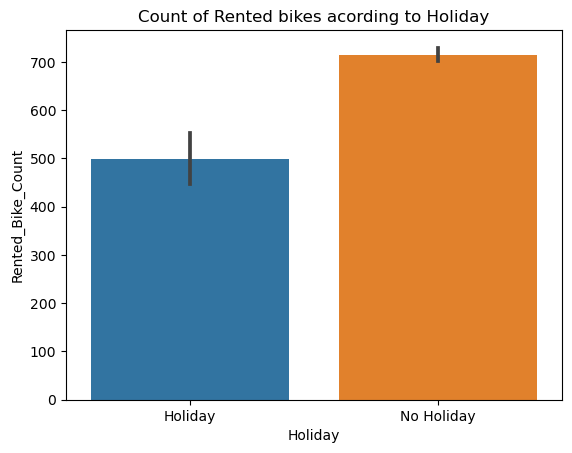

In [14]:
sns.barplot(data=df, x='Holiday', y='Rented_Bike_Count')
plt.title('Count of Rented bikes acording to Holiday')
plt.show()

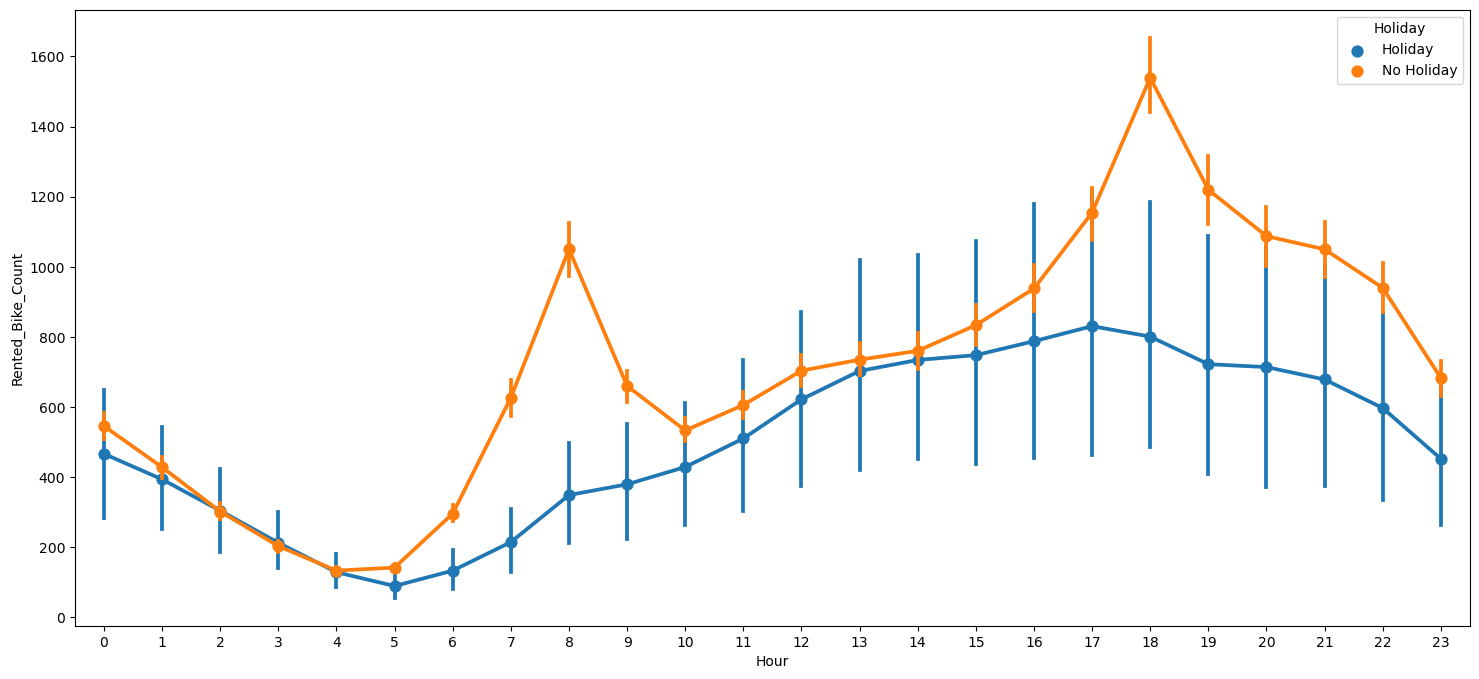

In [15]:
plt.figure(figsize=(18,8))
sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue='Holiday')
plt.show()

* ***In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,***
* ***In holiday, people uses the rented bike from 2pm-8pm***

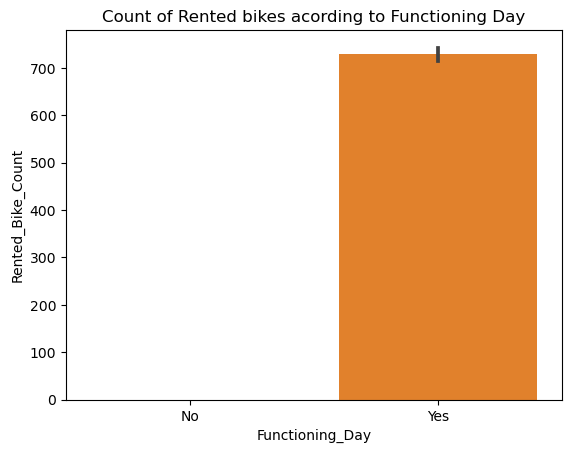

In [16]:
sns.barplot(data=df, x='Functioning_Day', y='Rented_Bike_Count')
plt.title('Count of Rented bikes acording to Functioning Day')
plt.show()

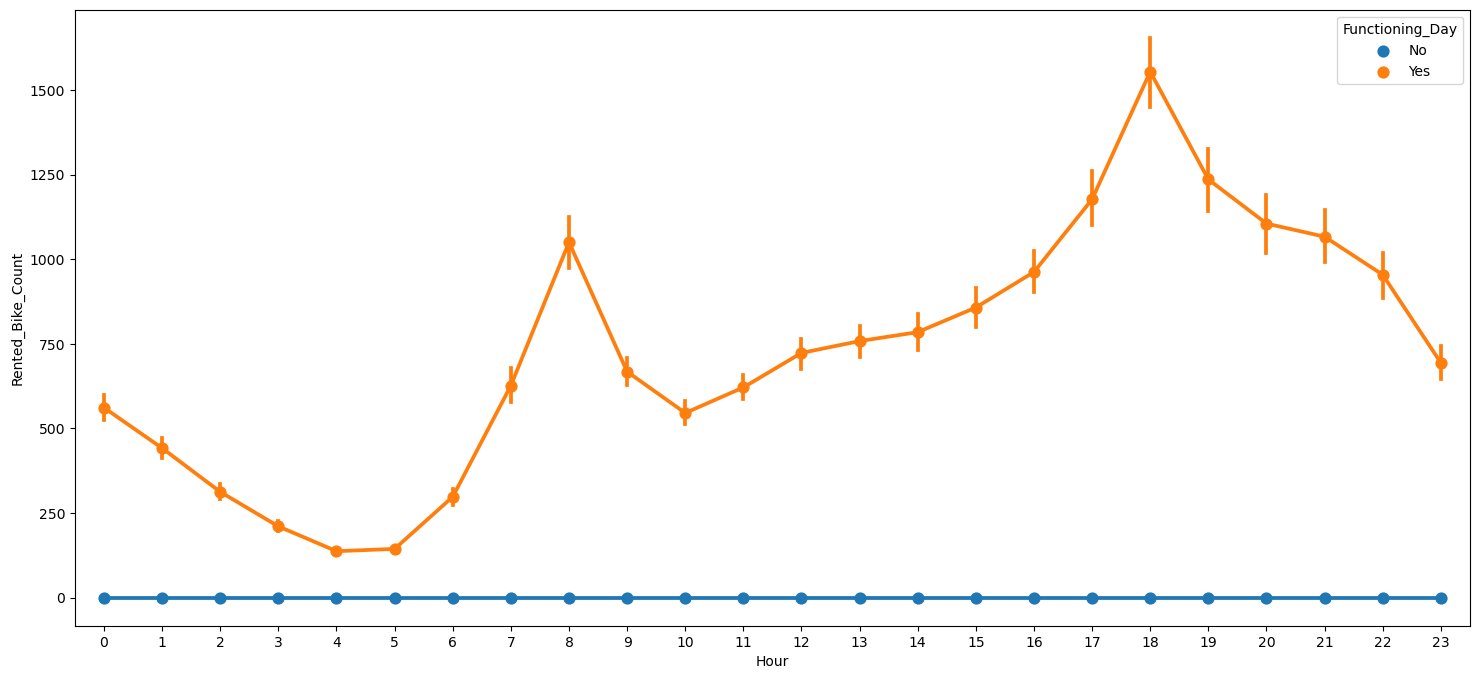

In [17]:
plt.figure(figsize=(18,8))
sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue='Functioning_Day')
plt.show()

* ***In the above bar plot and point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that,***
* ***Peoples don't use reneted bikes in no functioning day.*** 

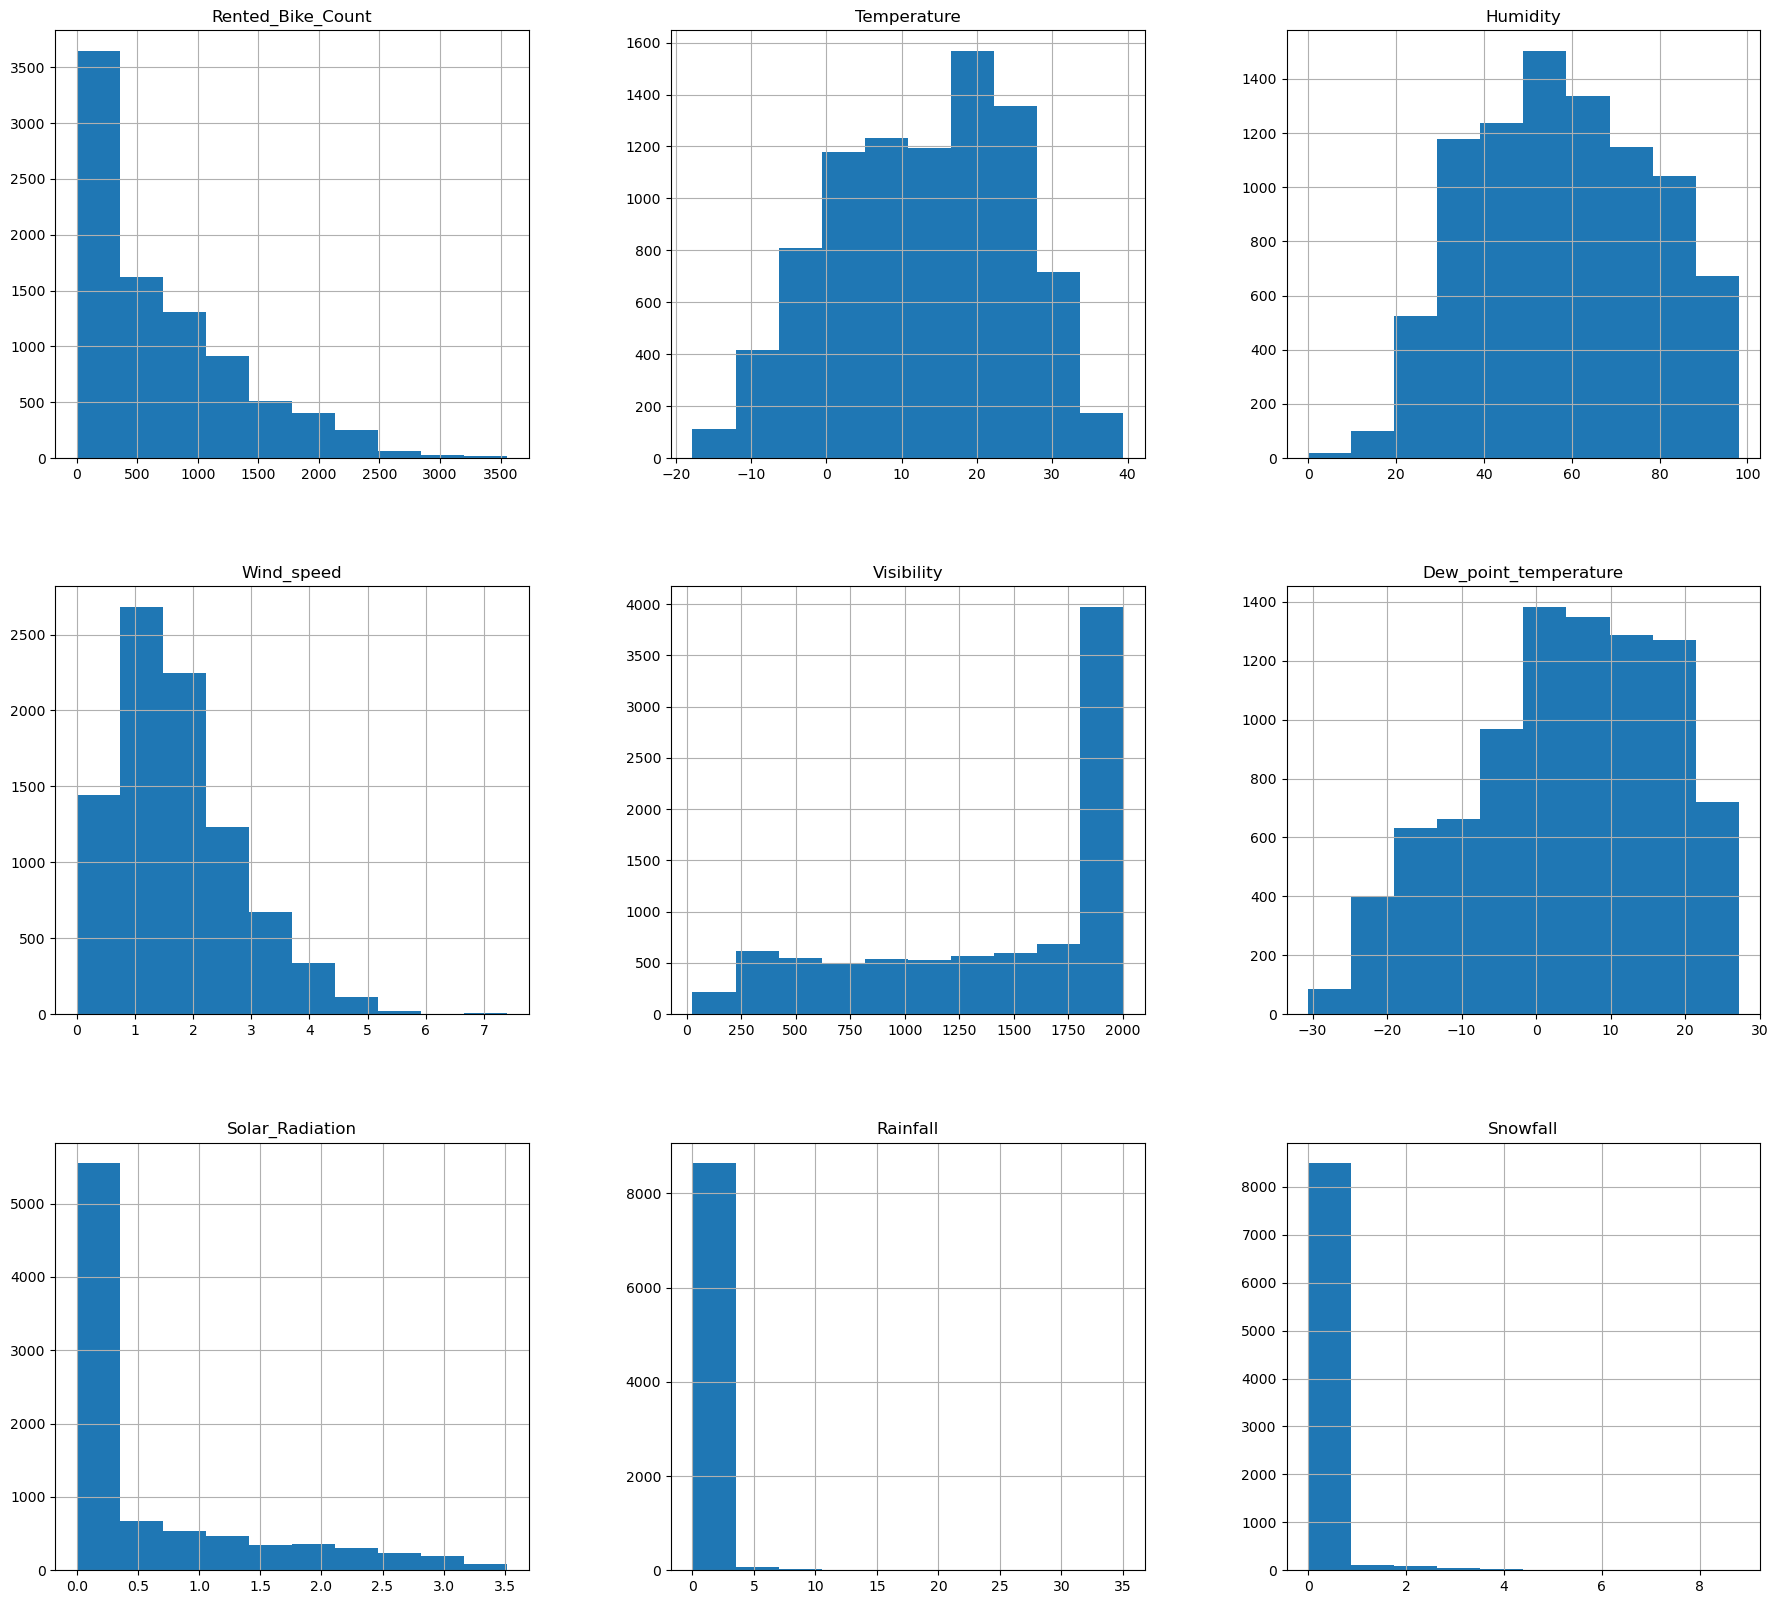

In [18]:
df.drop(columns=['Date', 'Hour', 'Month']).hist(figsize=(22, 20))
plt.show()

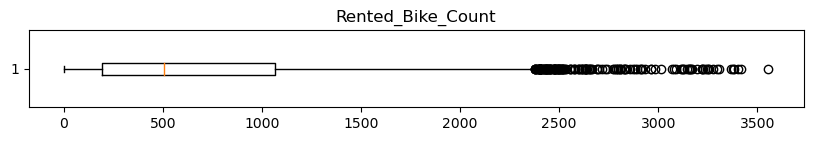

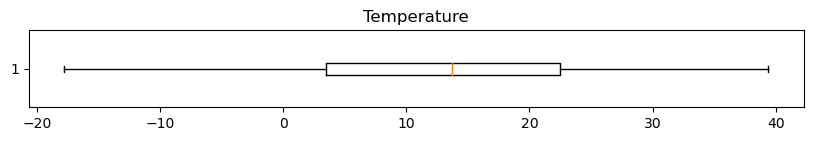

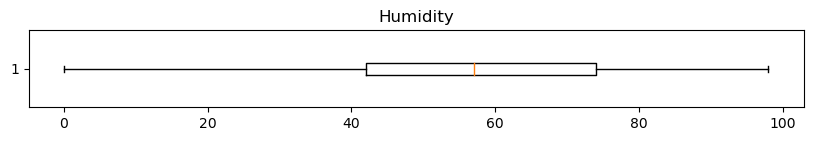

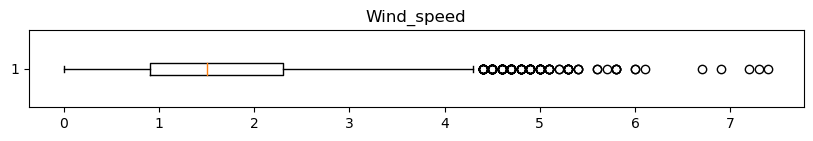

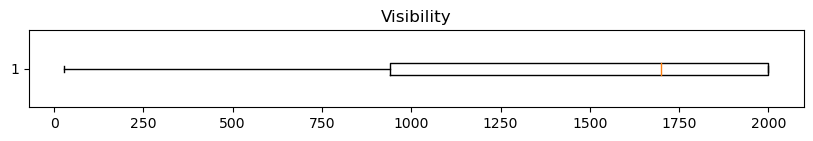

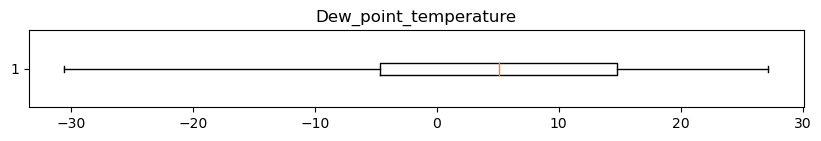

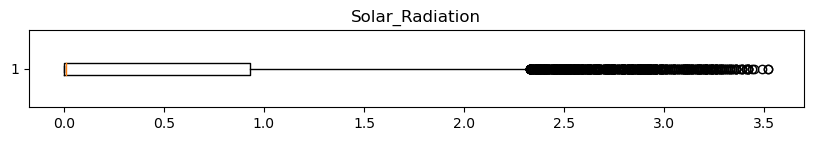

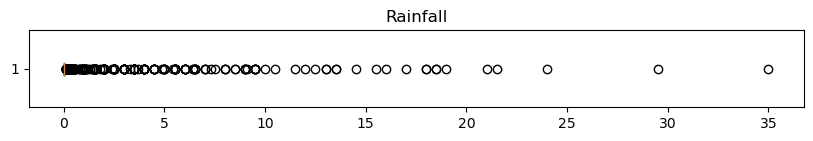

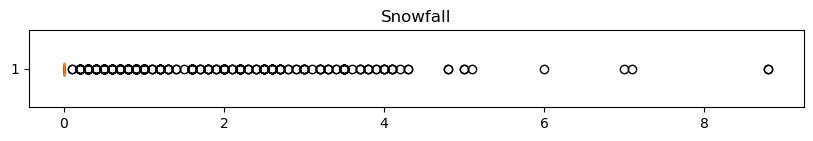

In [19]:
cols = df.select_dtypes(['int', 'float'])

for col in cols:
    plt.figure(figsize=(10,1))
    plt.boxplot(data=df, x=col, vert=False)
    plt.title(col)
    plt.show()

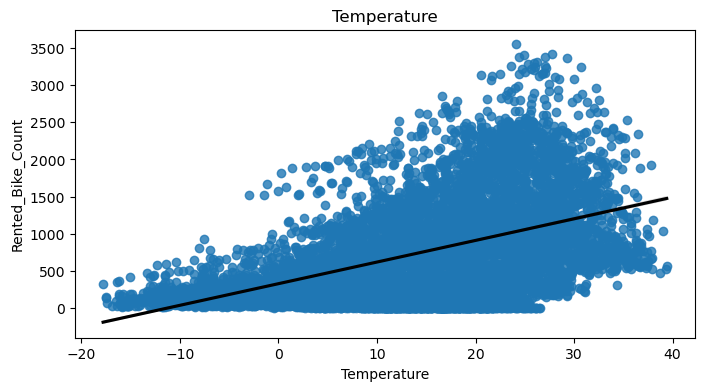

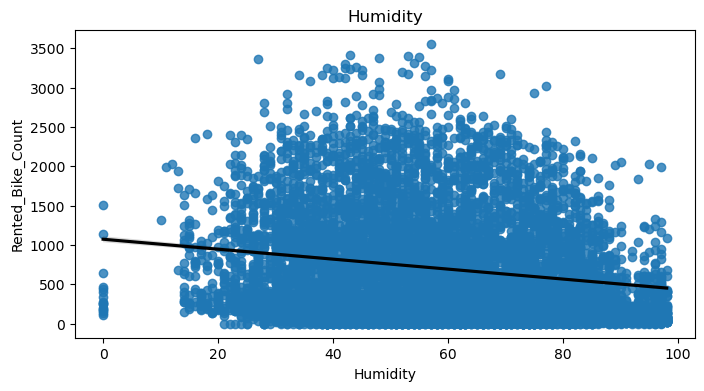

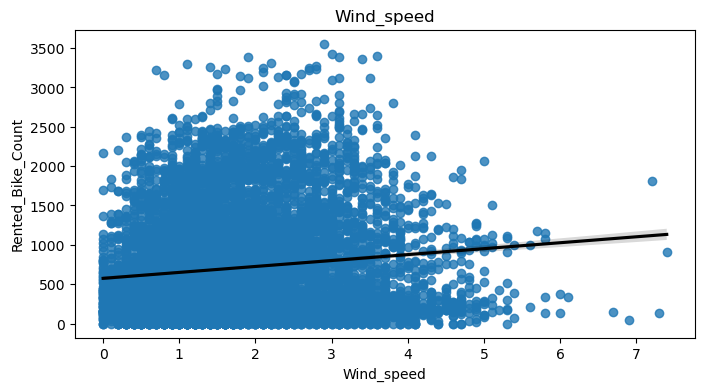

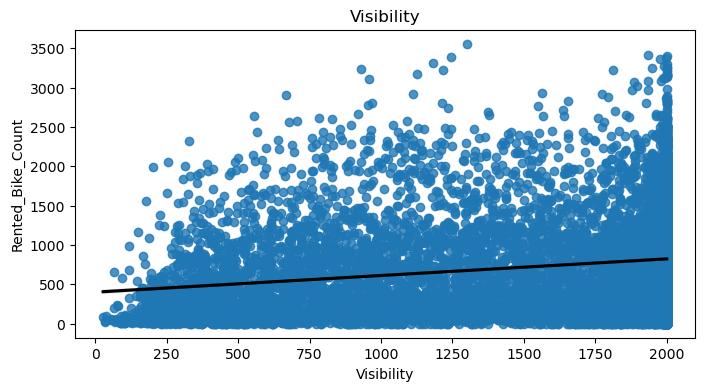

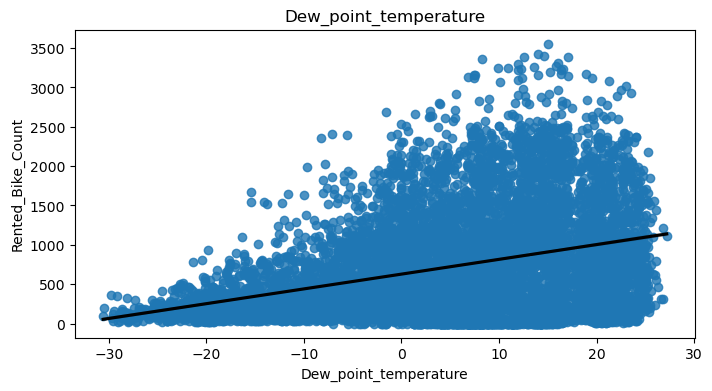

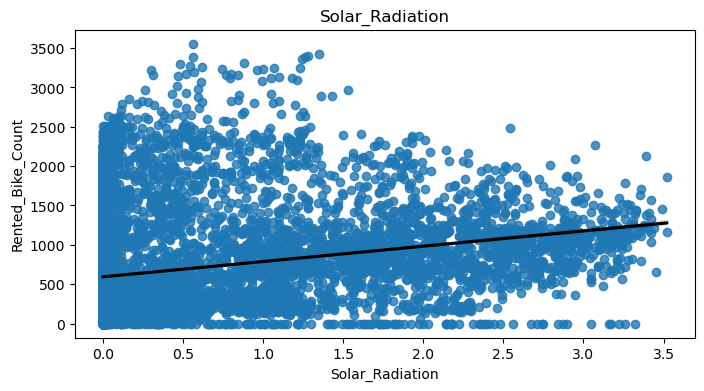

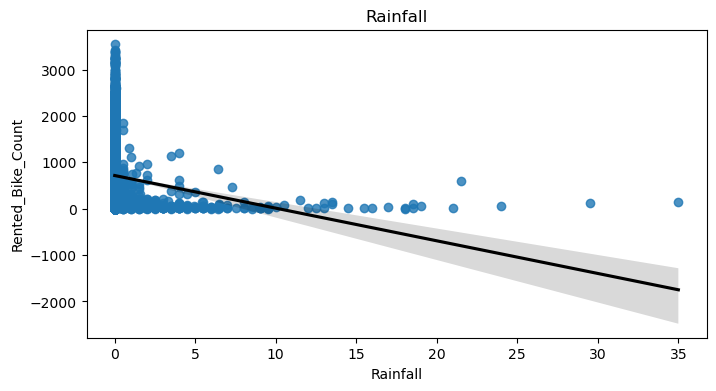

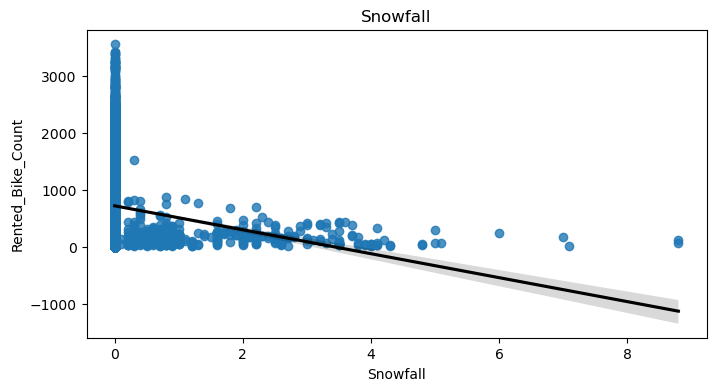

In [20]:
cols = df.select_dtypes(['int', 'float']).drop(columns='Rented_Bike_Count')

for col in cols:
    plt.figure(figsize=(8,4))
    sns.regplot(data=df, x=col, y='Rented_Bike_Count', line_kws={"color": "black"})    
    plt.title(col)
    plt.show()

* ***Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

In [21]:
df.loc[df['Rainfall']>=4,'Rainfall']= 4
df.loc[df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5 
df.loc[df['Snowfall']>2,'Snowfall']= 2
df.loc[df['Wind_speed']>=4,'Wind_speed']= 4

we have applied outlier treatment techniques to the dataset by replacing the outliers with the maximum values.

#### A correlation Heatmap is a type of graphical representation that displays the correlation matrix, which helps to determine the correlation between different variables.

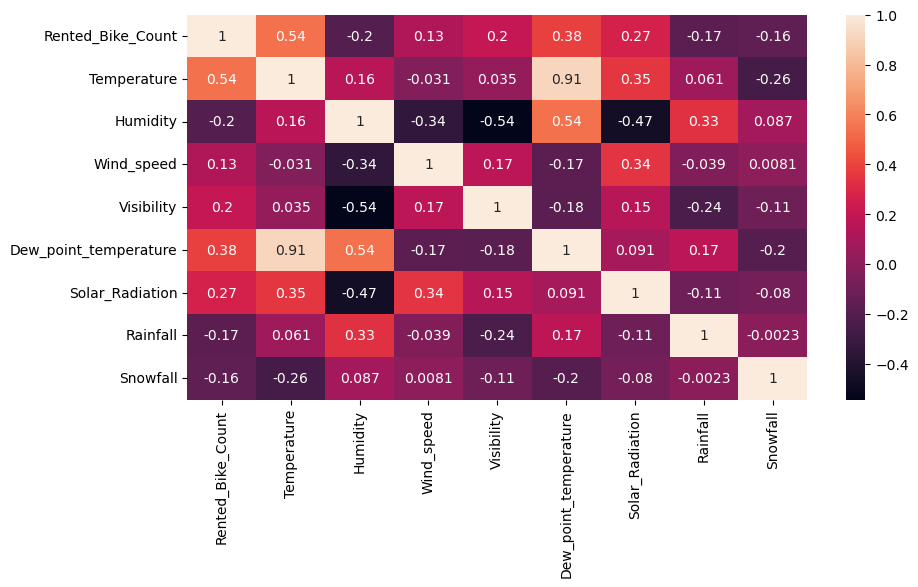

In [22]:
 plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

big correlation between 'Dew_point_temperature' and 'temperature'

In [23]:
df.drop(columns='Dew_point_temperature', inplace=True)

### Create the dummy variables 
A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

### One Hot Encoding

In [24]:
categorical_features=list(df.select_dtypes(['category']).columns)

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df = one_hot_encoding(df, col)
df.head()

,Date,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,2017-12-01,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,2017-12-01,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
2,2017-12-01,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,2017-12-01,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,2017-12-01,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


### Train Test split for regression

In [25]:
X = df.drop(columns=['Date', 'Rented_Bike_Count'])
y = np.sqrt(df['Rented_Bike_Count'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [27]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6570, 46)
X_test shape: (2190, 46)
y_train shape: (6570,)
y_test shape: (2190,)


### DECISION TREE

In [28]:
decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,).fit(X_train, y_train)

In [29]:
print(decision_regressor.score(X_train,y_train))
decision_regressor.score(X_test, y_test)

0.6760554499030755


0.633112141299685

In [30]:
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [31]:
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)

MAE : 5.150966345188393
R2 : 0.6760554499030755


In [32]:
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)

r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)

MAE : 5.3637898781235895
R2 : 0.633112141299685


### RANDOM FOREST

In [33]:
rf_model = RandomForestRegressor().fit(X_train,y_train)

In [34]:
print(rf_model.score(X_train,y_train))
rf_model.score(X_test, y_test)

0.9849643140855417


0.8937868406010349

In [35]:
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [36]:
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)

r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)

MAE : 1.0160991751601307
R2 : 0.9849643140855417


In [37]:
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)

r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)

MAE : 2.7012086051195876
R2 : 0.8937868406010349


### GRADIENT BOOSTING

In [38]:
gb_model = GradientBoostingRegressor().fit(X_train,y_train)

In [39]:
print(gb_model.score(X_train,y_train))
gb_model.score(X_test, y_test)

0.8648516912606663


0.8526505664709323

In [40]:
y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [41]:
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)

r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)

MAE : 3.469659380687382
R2 : 0.8648516912606663


In [42]:
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)

r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)

MAE : 3.52992573556787
R2 : 0.8526505664709323


### Using GridSearchCV, GRADIENT BOOSTING

In [43]:
gb_model = GradientBoostingRegressor()

# Grid search
param_dict = {'learning_rate': [0.1, 0.01],
              'n_estimators': [50, 100],
              'max_depth': [3, 5]}

gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=param_dict,
                       cv=3, verbose=2, n_jobs=-1)

gb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [44]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=5)

In [45]:
gb_optimal_model = gb_grid.best_estimator_

In [46]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [47]:
print(gb_optimal_model.score(X_train,y_train))
gb_optimal_model.score(X_test, y_test)

0.9214960484894728


0.8878988249231033

In [48]:
y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [49]:
MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)

r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)

MAE : 2.532304557978287
R2 : 0.9214960484894728


In [50]:
MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)

r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)

MAE : 2.9281554602517486
R2 : 0.8878988249231033


In [51]:
features = X_train.columns
importances = gb_optimal_model.feature_importances_
indices = np.argsort(importances)

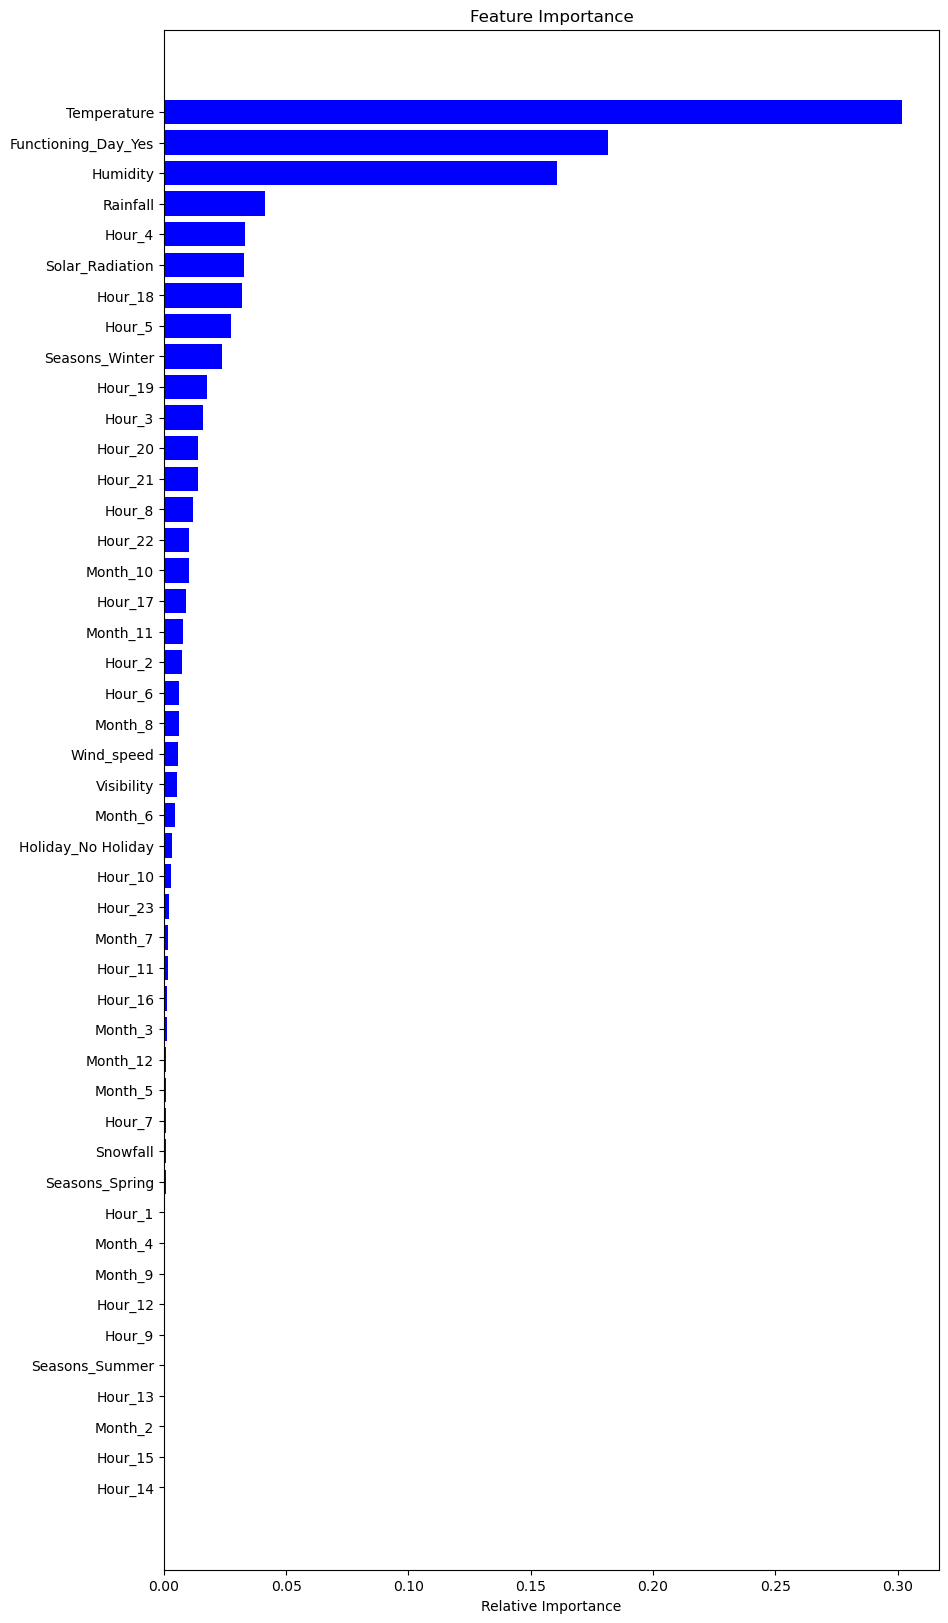

In [52]:
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()